B0: 0.6405613571058237
B1: 0.001154860288564593


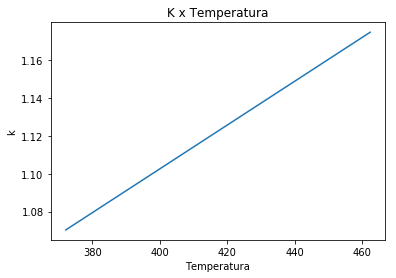

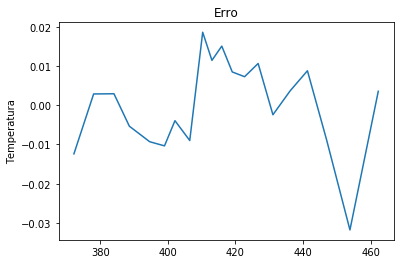

In [5]:
import numpy as np
from scipy.interpolate import spline
import matplotlib.pyplot as plt


def Linear2(Yi,x):
    xm = np.mean(x)
    ym = np.mean(Yi)

    Delta = np.array([])    
    i = 0
    while i < len(x): 
        i +=1
        Delta = np.hstack((Delta,((x[i-1] - xm)**2)))
        D = np.sum(Delta)*len(x)
    
    b1 = (len(x)*np.sum(Yi*x)-np.sum(Yi)*np.sum(x))/D
    b0 = ym -b1*xm
    
    return b0,b1

#Lista 2) 5.27
Xi = np.array([8.81,8.35,7.97,7.66,
               7.38,7.10,6.86,6.64,
               6.44,6.27,6.11,5.96,
               5.75,5.51,5.34,5.10,
               4.77,4.52,4.19,3.87])
    
Yi = np.array([1.178,1.133,1.148,1.159,
               1.148,1.136,1.144,1.136,
               1.133,1.136,1.129,1.133,
               1.101,1.101,1.091,1.087,
               1.084,1.087,1.080,1.058])
#    
T = np.array([])
for i in Xi:
    T = np.hstack((T,(301.6+18.24*i)))
    
Xi = T
B0,B1 = Linear2(Yi,Xi)
print('B0:',B0)
print('B1:',B1)

Erro = np.array([])
Val = np.array([])
for i in Xi:
    Val = np.hstack((Val,(B0+B1*i)))
     

Erro = Yi - Val

plt.figure()
plt.plot(Xi,Val)
plt.xlabel('Temperatura')
plt.ylabel('k')
plt.title('K x Temperatura')

plt.figure()
plt.plot(T,Erro)
plt.ylabel('Erro')
plt.ylabel('Temperatura')
plt.title('Erro')
plt.show()

B0: 0.2997142857142861
B1: 0.0006571428571428512


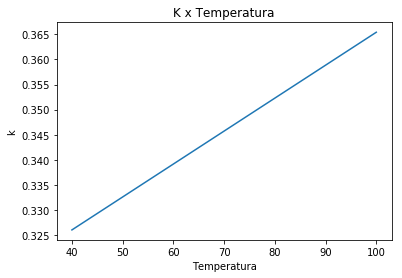

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def Linear2(Yi,x):
    xm = np.mean(x)
    ym = np.mean(Yi)

    Delta = np.array([])    
    i = 0
    while i < len(x): 
        i +=1
        Delta = np.hstack((Delta,((x[i-1] - xm)**2)))
        D = np.sum(Delta)*len(x)
    
    b1 = (len(x)*np.sum(Yi*x)-np.sum(Yi)*np.sum(x))/D
    b0 = ym -b1*xm
    
    return b0,b1

#Lista 2) 5.9
Yi = np.array([0.325,0.332,0.340,0.347,0.353,0.359,0.364])
Xi = np.array([40,50,60,70,80,90,100])

B0,B1 = Linear2(Yi,Xi)
print('B0:',B0)
print('B1:',B1)

Val = np.array([])
for i in Xi:
    Val = np.hstack((Val,(B0+B1*i)))
     
plt.figure()
plt.plot(Xi,Val)
plt.xlabel('Temperatura')
plt.ylabel('k')
plt.title('K x Temperatura')
plt.show()

C:\Users\lucas.peixoto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


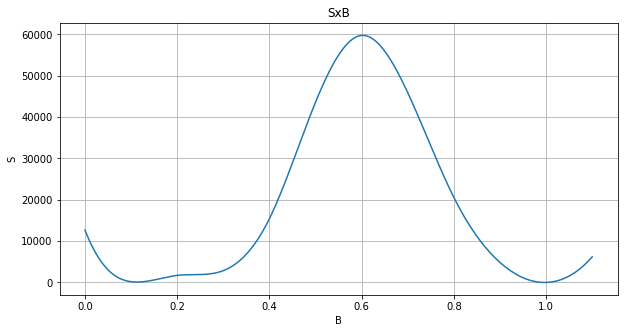

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import spline

def S_a(Yi,x,B):
    S_i = np.array([])
    S_f = np.array([]) 

    for (Ti,t) in zip(Yi,x):
        S =(Ti-100*np.sin(B*t))**2
        S_i = np.hstack((S_i,S))
        S_f = np.sum(S_i)
    return S_f

#Lista 1) Ex 1.5
Theta = np.array([2.79,6.98,8.38])
Yi = np.array([34.2,64.2,86])

Bz = np.linspace(0.,1.1,12)

S_ff = np.array([])
for B in Bz:
    S = np.round(S_a(Yi,Theta,B),5)
    S_ff = np.hstack((S_ff,S))

Bz_new = np.linspace(Bz.min(),Bz.max(),200)  
S_ff_smooth = spline(Bz,S_ff,Bz_new)

plt.figure(figsize=(10,5))
plt.plot(Bz_new,S_ff_smooth)
plt.title('SxB')
plt.xlabel('B')
plt.ylabel('S')
plt.grid('on')
plt.show()


Valor de B: -3.2653061224489797
Valores Medidos
[ 0.419  0.204  0.159 -0.106  0.042]
Valores Simulados
[0.44205254 0.19541045 0.08638169 0.03818524 0.01687988]
Erro (Yi-Val)
[-0.02305254  0.00858955  0.07261831 -0.14418524  0.02512012]


C:\Users\lucas.peixoto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:44: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
C:\Users\lucas.peixoto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


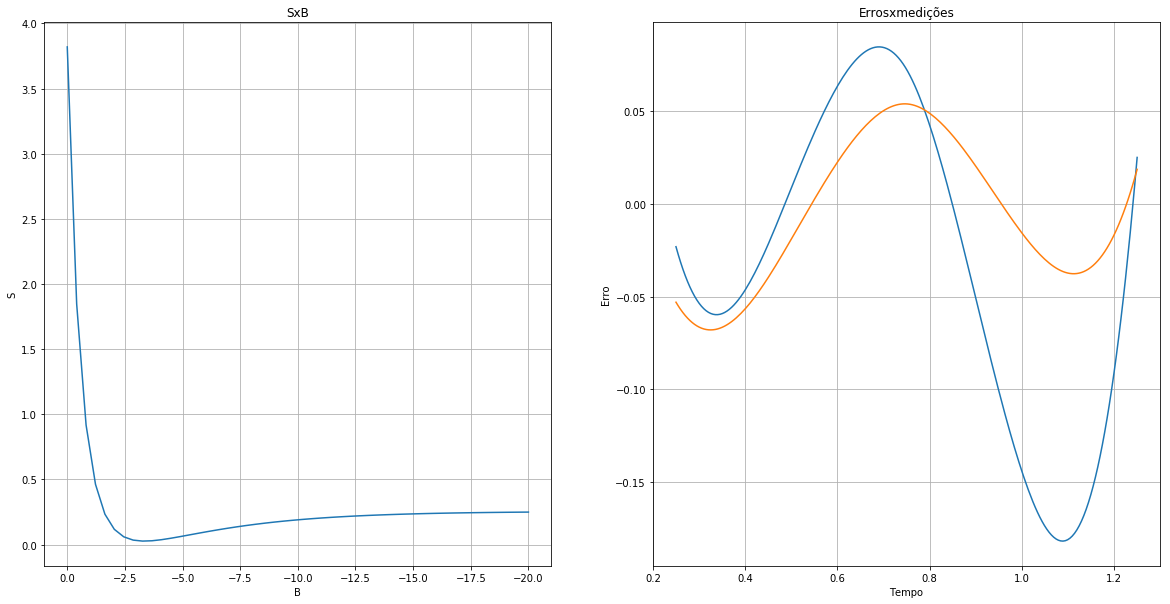

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import spline

def S_a(Yi,x,B):
    S_i = np.array([])
    S_f = np.array([]) 

    for (Ti,t) in zip(Yi,x):
        S =(Ti-np.exp(B*t))**2
        S_i = np.hstack((S_i,S))
        S_f = np.sum(S_i)
    return S_f

def func(B,Tempo):
    f = np.array([])
    for t in Tempo:
        x = np.exp(B*t)
        f = np.hstack((f,x))
    return f


#Lista 1) Ex 1.4
Tempo = np.array([0.25,0.5,0.75,1.,1.25])
Yi = np.array([0.419,0.204,0.159,-0.106,0.042])
Erro = np.array([-.053,-.019,.054,-.0156,.0187])

Bz = np.linspace(-0.,-20,50)

S_ff = np.array([])
for B in Bz:
    S = np.round(S_a(Yi,Tempo,B),5)
    S_ff = np.hstack((S_ff,S))


z = Bz[S_ff.argmin()]
print('Valor de B:',z)
Val = func(z,Tempo)
    
Erro_real = Yi - Val
    
    
Tempo_new = np.linspace(Tempo.min(),Tempo.max(),200)  
Erro_smooth = spline(Tempo,Erro,Tempo_new)
Erro_real_smooth = spline(Tempo,Erro_real,Tempo_new)
     
print('Valores Medidos')
print(Yi)
print('Valores Simulados')
print(Val)
print('Erro (Yi-Val)')
print(Erro_real)

fig, (ax1,ax2) = plt.subplots(1,2,sharey=False,figsize=(20,10))
ax1.plot(Bz,S_ff)
ax1.set_title('SxB')
ax1.set_ylabel('S')
ax1.set_xlabel('B')
ax1.invert_xaxis()
ax1.grid('on')
ax2.plot(Tempo_new,Erro_real_smooth)
ax2.plot(Tempo_new,Erro_smooth)
ax2.set_xlabel('Tempo')
ax2.set_ylabel('Erro')
ax2.set_title('Errosxmedições')
ax2.grid('on')

O valor de B: 0.43865


C:\Users\lucas.peixoto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  app.launch_new_instance()
C:\Users\lucas.peixoto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


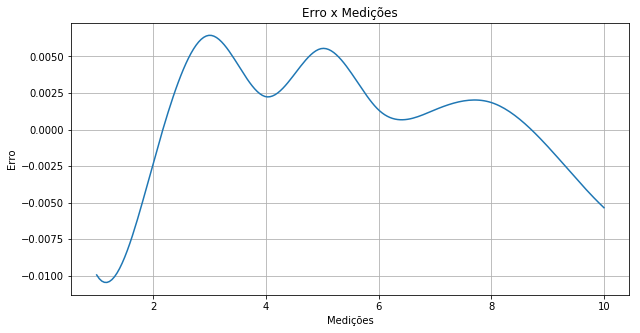

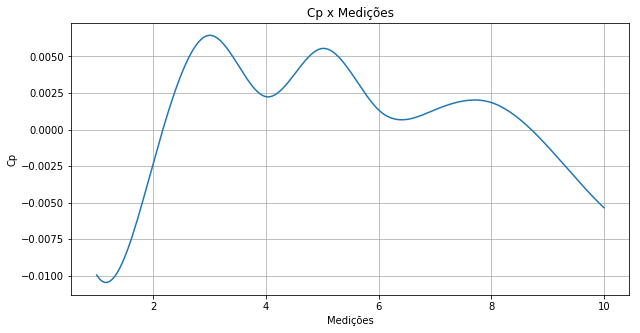

In [15]:
import matplotlib.pyplot as plt

#Lista 1) Ex 1.3
I = np.array([1,2,3,4,5,6,7,8,9,10])
cp = np.array([0.4287,0.4363,0.4451,0.4409,0.4442,0.4400,0.4400,0.4405,0.4375,0.4333])


B = np.sum(cp)/len(cp)
print('O valor de B:',B)

Erro = np.array([])
for i in cp:
    Erro = np.hstack((Erro,(i-B)))
    
    
I_new = np.linspace(I.min(),I.max(),200)  
Erro_smooth = spline(I,Erro,I_new)    
cp_smooth = spline(I,Erro,I_new)     

plt.figure(figsize=(10,5))
plt.plot(I_new,Erro_smooth)
plt.title('Erro x Medições')
plt.xlabel('Medições')
plt.ylabel('Erro')
plt.grid('on')

plt.figure(figsize=(10,5))
plt.plot(I_new,cp_smooth)
plt.title('Cp x Medições')
plt.xlabel('Medições')
plt.ylabel('Cp')
plt.grid('on')

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def lin(T,t):
    A = np.array([[len(t),np.sum(t)],
                  [np.sum(t),np.sum(np.square(t))]])    
    b = np.array([np.sum(T),np.sum(T*t)])
    
    Coef = np.linalg.solve(A,b)
    return Coef

#Lista 1) Ex 1.1
T = np.array([100,200,300,400])
K = np.array([90,98,111,121])

B0,B1 = lin(K,T)
print('B0:',B0,'B1:',B1)

Val = np.array([])
Erro = np.array([])
for i in T:
    Val = np.hstack((Val,(B0+B1*i)))
    
print('Residual:',(K-Val))
    



B0: 78.50000000000001 B1: 0.10599999999999994
Residual: [ 0.9 -1.7  0.7  0.1]
